# Analzying Boise's Rain Patterns

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

include_friday_as_weeked = False

In [65]:
df = pd.read_csv("./stanley_weather.csv")

## Calculating rainy weekend vs week days

In [66]:
rainy_days = df.loc[df['precipitation'] > 0]
rainy_weekend = rainy_days.loc[rainy_days['weekday'] > (3 if include_friday_as_weeked else 4)]
rainy_weekday = rainy_days.loc[rainy_days['weekday'] < (6 if include_friday_as_weeked else 5)]

[len(rainy_days.loc[rainy_days['weekday'] == x]) for x in range(0,7)]

[635, 622, 628, 621, 635, 630, 614]

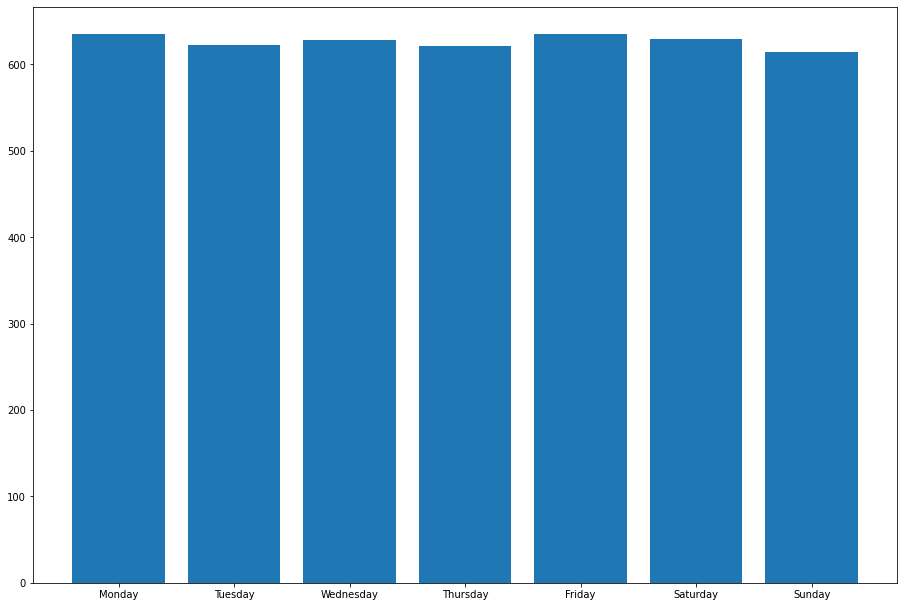

In [67]:
fig = plt.figure()
ax = fig.add_axes([0,0,2,2])
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
values = [len(rainy_days.loc[rainy_days['weekday'] == x]) for x in range(0,7)]
ax.bar(days,values)
plt.show()

## Looking at ALL of the data

In [68]:
weekend = df.loc[df['weekday'] > (3 if include_friday_as_weeked else 4)]
weekend_rain = weekend.loc[weekend['precipitation'] > 0]

weekday = df.loc[df['weekday'] < (4 if include_friday_as_weeked else 5)]
weekday_rain = weekday.loc[weekday['precipitation'] > 0]

In [69]:
print(f"Total Weekend Days: {str(len(weekend))}\n"
      f"Total Weekend Rain Days: {str(len(weekend_rain))}\n"
      f"Rain Percentage: {str((len(weekend_rain)/len(weekend))*100)}%\n")

print(f"Total Weekday Days: {str(len(weekday))}\n"
      f"Total Weekday Rain Days: {str(len(weekday_rain))}\n"
      f"Rain Percentage: {str((len(weekday_rain)/len(weekday))*100)}%")

Total Weekend Days: 10690
Total Weekend Rain Days: 1244
Rain Percentage: 11.637043966323667%

Total Weekday Days: 26723
Total Weekday Rain Days: 3141
Rain Percentage: 11.753919844328856%


## Looking at each individual year

In [70]:
rain_data = []

for x in range(min(df['year']), max(df['year'])+1):
      year_data = df.loc[df['year']==x]
      year_data_rain_days = year_data.loc[year_data['precipitation'] > 0]
      weekend = year_data.loc[year_data['weekday'] > (3 if include_friday_as_weeked else 4)]
      weekend_rain = weekend.loc[weekend['precipitation'] > 0]
      weekday = year_data.loc[year_data['weekday'] < (4 if include_friday_as_weeked else 5)]
      weekday_rain = weekday.loc[weekday['precipitation'] > 0]

      rain_data.append({
            'year': x,
            'total_days': len(year_data),
            'total_rain_days': len(year_data_rain_days),
            'total_weekend_days': len(weekend),
            'total_weekend_rain_days': len(weekend_rain),
            'weekend_rain_percentage': (len(weekend_rain)/len(weekend))*100,
            'total_weekday_days': len(weekday),
            'total_weekday_rain_days': len(weekday_rain),
            'weekday_rain_percentage': (len(weekday_rain)/len(weekday))*100
      })

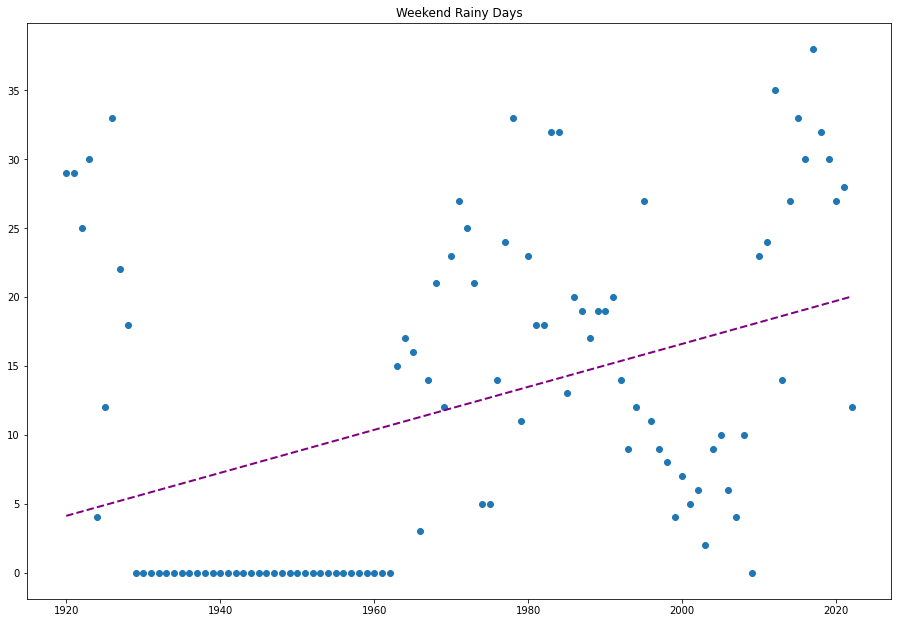

In [71]:
fig = plt.figure()
ax = fig.add_axes([0, 0, 2, 2])

#define data
x = np.array([x['year'] for x in rain_data])
y = np.array([x['total_weekend_rain_days'] for x in rain_data])

#create scatterplot
plt.scatter(x, y)

#calculate equation for trendline
z = np.polyfit(x, y, 1)
p = np.poly1d(z)

#add trendline to plot
plt.plot(x, p(x), color='purple', linewidth='2', linestyle='--')

plt.title("Weekend Rainy Days")
plt.show()

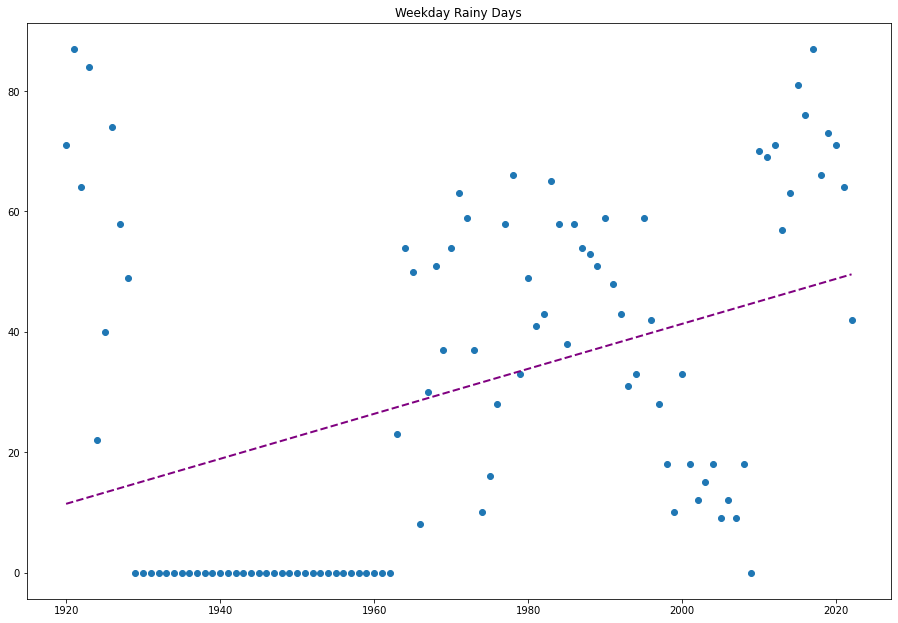

In [72]:
fig = plt.figure()
ax = fig.add_axes([0, 0, 2, 2])

#define data
x = np.array([x['year'] for x in rain_data])
y = np.array([x['total_weekday_rain_days'] for x in rain_data])

#create scatterplot
plt.scatter(x, y)

#calculate equation for trendline
z = np.polyfit(x, y, 1)
p = np.poly1d(z)

#add trendline to plot
plt.plot(x, p(x), color='purple', linewidth='2', linestyle='--')

plt.title("Weekday Rainy Days")
plt.show()

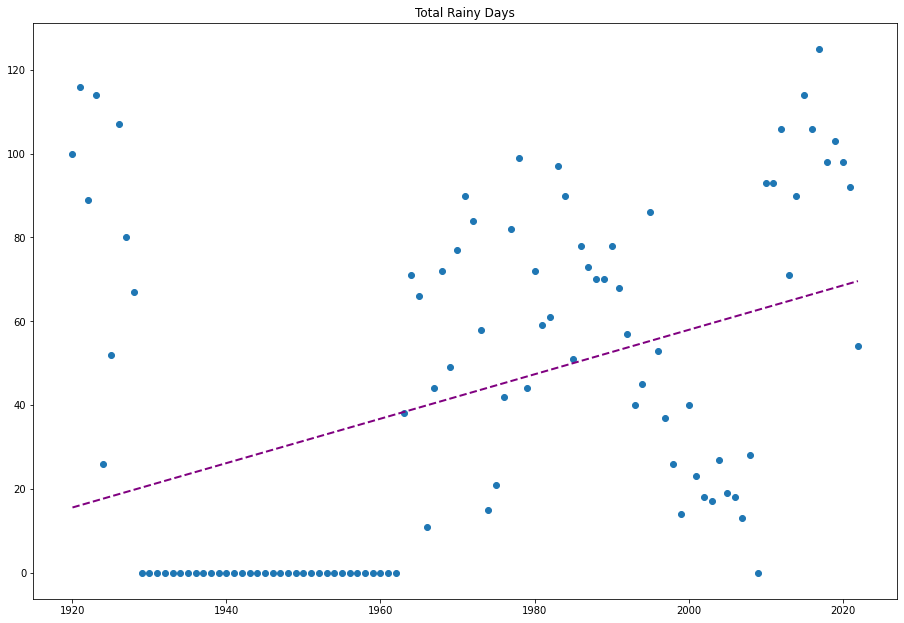

In [73]:
fig = plt.figure()
ax = fig.add_axes([0, 0, 2, 2])

#define data
x = np.array([x['year'] for x in rain_data])
y = np.array([x['total_rain_days'] for x in rain_data])

#create scatterplot
plt.scatter(x, y)

#calculate equation for trendline
z = np.polyfit(x, y, 1)
p = np.poly1d(z)

#add trendline to plot
plt.plot(x, p(x), color='purple', linewidth='2', linestyle='--')

plt.title("Total Rainy Days")
plt.show()

In [74]:
z

array([ 5.29895005e-01, -1.00185024e+03])